In [37]:
import pandas as pd
import pyod
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.iforest import IForest
import scikitplot as skplt
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report, recall_score,roc_auc_score

In [38]:
df = pd.read_csv('', low_memory=False)  # data frame for training
df_1 = pd.read_csv('', low_memory=False)  # data frame for testing

In [39]:
# best results regarding anomalies in the behavior with date, agent, messsage type, sender, neighbor, receiver
features = ['date','agent', 'msg_type', 'sender', 'neighbor', 'receiver', 'anomaly']

df = df[features]
df = df.fillna(-1)

df_1 = df_1[features]
df_1 = df_1.fillna(-1)

In [40]:
df['anomaly']=np.where(df_1['anomaly']==1,0,df_1['anomaly'])
df['anomaly']=np.where(df_1['anomaly']==-1,1,df_1['anomaly'])

df_1['anomaly']=np.where(df_1['anomaly']==1,0,df_1['anomaly'])
df_1['anomaly']=np.where(df_1['anomaly']==-1,1,df_1['anomaly'])

In [41]:
#------------------- Anomaly Detection -------------------------------------

In [42]:
# training data
training_features=['date','agent', 'msg_type', 'sender', 'neighbor', 'receiver']
x=int(df.shape[0]*1.)
train_data=df.tail(x)
train=train_data[training_features]

# test data 
y=int(df_1.shape[0]*1.)
test_data=df_1.head(y)
test=test_data[training_features]
display(train,test)

date  agent
15047  1.554932e+09      1
15048  1.554933e+09      1
15049  1.554933e+09      1
15050  1.554933e+09      1
15051  1.554933e+09      1
...             ...    ...
50150  1.556234e+09      1
50151  1.556234e+09      1
50152  1.556234e+09      1
50153  1.556234e+09      1
50154  1.556234e+09      1

[35108 rows x 2 columns]

date  agent
0      1.554442e+09      1
1      1.554442e+09      1
2      1.554442e+09      1
3      1.554442e+09      1
4      1.554443e+09      1
...             ...    ...
15042  1.554932e+09      1
15043  1.554932e+09      1
15044  1.554932e+09      1
15045  1.554932e+09      1
15046  1.554932e+09      1

[15047 rows x 2 columns]

In [43]:
#Anomaly arrays
true_label_train=train_data['anomaly']
true_label_test=test_data['anomaly']
#plt.plot(true_label_train)
#plt.plot(true_label_test)

In [44]:
anomalies_train=sum(train_data['anomaly'])
anomalies_test=sum(test_data['anomaly'])
display(anomalies_train,anomalies_test)
fraq=(sum(train_data['anomaly']))/train_data.shape[0]
display(fraq)

8409

2145

0.23951805856215108

In [45]:
fraq_test=(sum(test_data['anomaly']))/test_data.shape[0]
display(fraq_test)

0.14255333289027713

In [46]:
# best results regarding anomalies in communication behavior with contamination 0.02, max_features 1, max_samples 0.8
model=IForest(contamination=0.02, max_features=1, max_samples=0.8)

In [47]:
model.fit(train)

IForest(behaviour='old', bootstrap=False, contamination=0.2, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [48]:
#--------------- Training -----------------------------

In [49]:
pred_train=model.labels_
train_scores=model.decision_scores_
#plt.plot(pred_train)

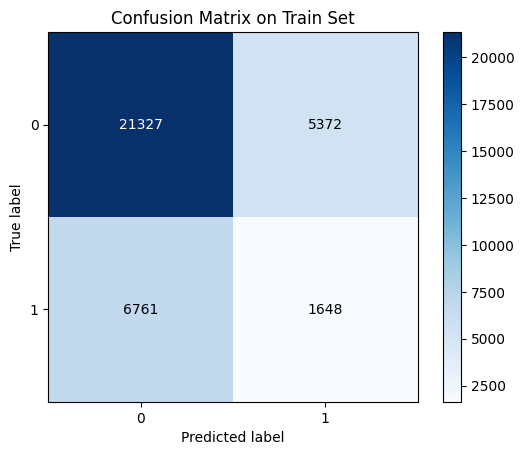

In [50]:
skplt.metrics.plot_confusion_matrix(true_label_train,pred_train, 
                                    normalize=False,
                                    title="Confusion Matrix on Train Set")
plt.savefig('Conf_matrix_IF_komm_15m_30s_train.png')

In [51]:
acc = accuracy_score(true_label_train,pred_train)
pre = precision_score(true_label_train,pred_train)
f1 = f1_score(true_label_train,pred_train)
recall = recall_score(true_label_train,pred_train)
auc = roc_auc_score(true_label_train,train_scores)
display(acc,pre,f1,recall,auc)
classification_report(true_label_train,pred_train,output_dict=True)

0.6544092514526604

0.23475783475783477

0.2136236956380841

0.19598049708645499

0.5743324459371285

{'0': {'precision': 0.7592922244374822,
  'recall': 0.7987939623206861,
  'f1-score': 0.7785423549382152,
  'support': 26699},
 '1': {'precision': 0.23475783475783477,
  'recall': 0.19598049708645499,
  'f1-score': 0.2136236956380841,
  'support': 8409},
 'accuracy': 0.6544092514526604,
 'macro avg': {'precision': 0.4970250295976585,
  'recall': 0.4973872297035705,
  'f1-score': 0.4960830252881496,
  'support': 35108},
 'weighted avg': {'precision': 0.6336567657723302,
  'recall': 0.6544092514526604,
  'f1-score': 0.6432341344171145,
  'support': 35108}}

"\n#15m mit allen 30s aufgefüllt:\n0.6194029850746269\n0.14697077690662866\n0.1336877593360996\n0.12260673088357713\n0.36379788454055645\n{'0': {'precision': 0.7373722991492543,\n  'recall': 0.7758717554964606,\n  'f1-score': 0.756132282084976,\n  'support': 26699},\n '1': {'precision': 0.14697077690662866,\n  'recall': 0.12260673088357713,\n  'f1-score': 0.1336877593360996,\n  'support': 8409},\n 'accuracy': 0.6194029850746269,\n 'macro avg': {'precision': 0.44217153802794146,\n  'recall': 0.44923924319001884,\n  'f1-score': 0.44491002071053776,\n  'support': 35108},\n 'weighted avg': {'precision': 0.595960472769562,\n  'recall': 0.6194029850746269,\n  'f1-score': 0.6070455784335204,\n  'support': 35108}}\n  "

In [53]:
#--------------------- Testing --------------------------------

In [54]:
pred = model.predict(test)
scores = model.decision_function(test)
#plt.plot(pred)

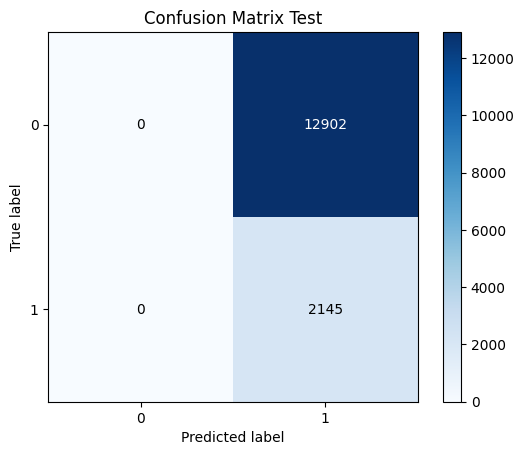

In [55]:
skplt.metrics.plot_confusion_matrix(true_label_test,pred, 
                                    normalize=False,
                                    title="Confusion Matrix Test")
plt.savefig('Conf_matrix_IF_komm_15m_30s_test.png')

In [56]:
acc = accuracy_score(true_label_test,pred)
pre = precision_score(true_label_test,pred)
f1 = f1_score(true_label_test,pred)
recall = recall_score(true_label_test,pred)
auc = roc_auc_score(true_label_test,scores)
display(acc,pre,f1,recall,auc)
classification_report(true_label_test,pred,output_dict=True)

0.14255333289027713

0.14255333289027713

0.2495346672871103

1.0

0.3263504980525598

{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 12902},
 '1': {'precision': 0.14255333289027713,
  'recall': 1.0,
  'f1-score': 0.2495346672871103,
  'support': 2145},
 'accuracy': 0.14255333289027713,
 'macro avg': {'precision': 0.07127666644513857,
  'recall': 0.5,
  'f1-score': 0.12476733364355515,
  'support': 15047},
 'weighted avg': {'precision': 0.020321452718126166,
  'recall': 0.14255333289027713,
  'f1-score': 0.03557199849344398,
  'support': 15047}}

"\n#15m mit allen 30s aufgefüllt\n0.16747524423473117\n0.04360822929488307\n0.07337820844737036\n0.23123543123543125\n0.12673433113674937\n{'0': {'precision': 0.5510481894908794,\n  'recall': 0.156874903115796,\n  'f1-score': 0.24422322775263952,\n  'support': 12902},\n '1': {'precision': 0.04360822929488307,\n  'recall': 0.23123543123543125,\n  'f1-score': 0.07337820844737036,\n  'support': 2145},\n 'accuracy': 0.16747524423473117,\n 'macro avg': {'precision': 0.29732820939288124,\n  'recall': 0.1940551671756136,\n  'f1-score': 0.15880071810000496,\n  'support': 15047},\n 'weighted avg': {'precision': 0.4787109319232306,\n  'recall': 0.16747524423473117,\n  'f1-score': 0.21986870084296964,\n  'support': 15047}}\n  "

In [58]:
#--------------- Grid Search ------------------

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [60]:
tuned_parameters = [{'n_estimators': [50,100,150], 'contamination': [0.015,0.02],
                     'max_features': [1,2,3], 'max_samples': [0.6,0.8]}]

In [61]:
scores = ['precision','recall','f1'] 

In [62]:
cv = [(slice(None), slice(None))]

In [63]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        IForest(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(train, true_label_train)

    print("Best parameters set found on:")
    print()
    print(clf.best_params_)
    print()
    print("Best score:")
    print(clf.best_score_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    print("Evaluation:")
    print()
    true_label, pred = true_label_test, clf.predict(test)
    print(classification_report(true_label, pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on:

{'contamination': 0.015, 'max_features': 2, 'max_samples': 0.6, 'n_estimators': 100}

Best score:
0.36269412501844517

Grid scores on development set:

0.270 (+/-0.343) for {'contamination': 0.015, 'max_features': 1, 'max_samples': 0.6, 'n_estimators': 50}
0.332 (+/-0.286) for {'contamination': 0.015, 'max_features': 1, 'max_samples': 0.6, 'n_estimators': 100}
0.329 (+/-0.280) for {'contamination': 0.015, 'max_features': 1, 'max_samples': 0.6, 'n_estimators': 150}
0.256 (+/-0.314) for {'contamination': 0.015, 'max_features': 1, 'max_samples': 0.8, 'n_estimators': 50}
0.266 (+/-0.334) for {'contamination': 0.015, 'max_features': 1, 'max_samples': 0.8, 'n_estimators': 100}
0.195 (+/-0.327) for {'contamination': 0.015, 'max_features': 1, 'max_samples': 0.8, 'n_estimators': 150}
0.316 (+/-0.259) for {'contamination': 0.015, 'max_features': 2, 'max_samples': 0.6, 'n_estimators': 50}
0.363 (+/-0.325) for {'contamination'

Best parameters set found on:

{'contamination': 0.015, 'max_features': 1, 'max_samples': 0.8, 'n_estimators': 50}

Best score:
0.3154286156914417

Grid scores on development set:

0.254 (+/-0.214) for {'contamination': 0.015, 'max_features': 1, 'max_samples': 0.6, 'n_estimators': 50}
0.256 (+/-0.194) for {'contamination': 0.015, 'max_features': 1, 'max_samples': 0.6, 'n_estimators': 100}
0.266 (+/-0.177) for {'contamination': 0.015, 'max_features': 1, 'max_samples': 0.6, 'n_estimators': 150}
0.315 (+/-0.198) for {'contamination': 0.015, 'max_features': 1, 'max_samples': 0.8, 'n_estimators': 50}
0.264 (+/-0.171) for {'contamination': 0.015, 'max_features': 1, 'max_samples': 0.8, 'n_estimators': 100}
0.248 (+/-0.182) for {'contamination': 0.015, 'max_features': 1, 'max_samples': 0.8, 'n_estimators': 150}
0.253 (+/-0.182) for {'contamination': 0.015, 'max_features': 2, 'max_samples': 0.6, 'n_estimators': 50}
0.255 (+/-0.214) for {'contamination': 0.015, 'max_features': 2, 'max_samples': 

In [64]:
#optimimized model
model_optimiert=IForest(contamination=0.015, max_features=2, n_estimators=100, max_samples=0.6)

In [65]:
model_optimiert.fit(train)

IForest(behaviour='old', bootstrap=False, contamination=0.015, max_features=2,
    max_samples=0.6, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [66]:
#--------------- Training -----------------------------

In [67]:
pred_train=model_optimiert.labels_
train_scores=model_optimiert.decision_scores_
#plt.plot(pred_train)

<AxesSubplot: title={'center': 'Confusion Matrix Training'}, xlabel='Predicted label', ylabel='True label'>

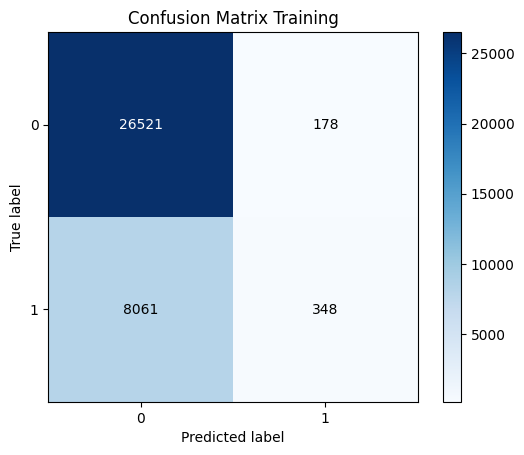

In [68]:
skplt.metrics.plot_confusion_matrix(true_label_train,pred_train, 
                                    normalize=False,
                                    title="Confusion Matrix Training")
#plt.savefig('Conf_matrix_IF_komm_15m_train.png')

In [69]:
acc = accuracy_score(true_label_train,pred_train)
pre = precision_score(true_label_train,pred_train)
f1 = f1_score(true_label_train,pred_train)
recall = recall_score(true_label_train,pred_train)
auc = roc_auc_score(true_label_train,train_scores)
display(acc,pre,f1,recall,auc)
classification_report(true_label_train,pred_train,output_dict=True)

0.7653241426455508

0.6615969581749049

0.0778959149412423

0.04138423118087763

0.692049596161479

{'0': {'precision': 0.7669018564571164,
  'recall': 0.9933330836360912,
  'f1-score': 0.8655537605456829,
  'support': 26699},
 '1': {'precision': 0.6615969581749049,
  'recall': 0.04138423118087763,
  'f1-score': 0.0778959149412423,
  'support': 8409},
 'accuracy': 0.7653241426455508,
 'macro avg': {'precision': 0.7142494073160106,
  'recall': 0.5173586574084844,
  'f1-score': 0.4717248377434626,
  'support': 35108},
 'weighted avg': {'precision': 0.7416794316634763,
  'recall': 0.7653241426455508,
  'f1-score': 0.6768954825552608,
  'support': 35108}}

"\n#1m_8996\n0.9671043892734793\n0.7882429259854195\n0.8273592399850851\n0.8705605404114496\n0.9772966248465541\n{'0': {'precision': 0.986977816982382,\n  'recall': 0.9767161441527122,\n  'f1-score': 0.9818201683627567,\n  'support': 294410},\n '1': {'precision': 0.7882429259854195,\n  'recall': 0.8705605404114496,\n  'f1-score': 0.8273592399850851,\n  'support': 29311},\n 'accuracy': 0.9671043892734793,\n 'macro avg': {'precision': 0.8876103714839008,\n  'recall': 0.9236383422820809,\n  'f1-score': 0.9045897041739208,\n  'support': 323721},\n 'weighted avg': {'precision': 0.9689835614660207,\n  'recall': 0.9671043892734793,\n  'f1-score': 0.9678346553077558,\n  'support': 323721}}\n\n#15m_2012:\n0.9664751568083492\n0.2385985232372955\n0.22160962818530222\n0.20687923675621392\n0.9764936363853943\n{'0': {'precision': 0.9813308354436364,\n  'recall': 0.9844113113587859,\n  'f1-score': 0.982868659724555,\n  'support': 337360},\n '1': {'precision': 0.2385985232372955,\n  'recall': 0.206879

In [71]:
#--------------------- Testing --------------------------------

In [72]:
pred = model_optimiert.predict(test)
scores = model_optimiert.decision_function(test)
#plt.plot(pred)

<AxesSubplot: title={'center': 'Confusion Matrix Test'}, xlabel='Predicted label', ylabel='True label'>

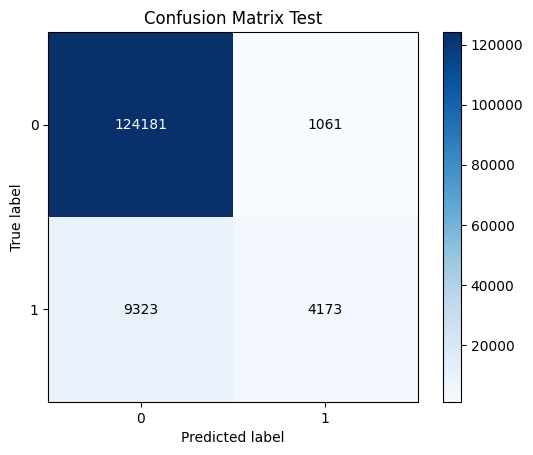

In [35]:
skplt.metrics.plot_confusion_matrix(true_label_test,pred, 
                                    normalize=False,
                                    title="Confusion Matrix Test")
#plt.savefig('Conf_matrix_IF_komm_15m_test.png')

In [36]:
acc_test = accuracy_score(true_label_test,pred)
pre_test = precision_score(true_label_test,pred)
f1_test = f1_score(true_label_test,pred)
recall_test = recall_score(true_label_test,pred)
auc_test = roc_auc_score(true_label_test,scores)
display(acc_test,pre_test,f1_test,recall_test,auc_test)
classification_report(true_label_test,pred,output_dict=True)

0.9251538871830356

0.7972869698127627

0.4455953016550988

0.3092027267338471

0.3124271756648542

{'0': {'precision': 0.9301668863854267,
  'recall': 0.9915284010156338,
  'f1-score': 0.9598679786354186,
  'support': 125242},
 '1': {'precision': 0.7972869698127627,
  'recall': 0.3092027267338471,
  'f1-score': 0.4455953016550988,
  'support': 13496},
 'accuracy': 0.9251538871830356,
 'macro avg': {'precision': 0.8637269280990947,
  'recall': 0.6503655638747404,
  'f1-score': 0.7027316401452587,
  'support': 138738},
 'weighted avg': {'precision': 0.917240742473415,
  'recall': 0.9251538871830356,
  'f1-score': 0.909841136324542,
  'support': 138738}}

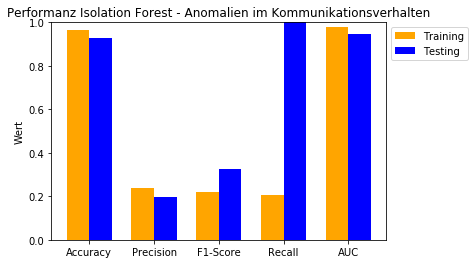

In [88]:
train_performanz = [acc,pre,f1,recall,auc]
test_performanz = [acc_test,pre_test,f1_test,recall_test,auc_test]
labels = ('Accuracy', 'Precision', 'F1-Score', 'Recall', 'AUC')

x = np.arange(len(labels)) 
width = 0.35  

plt.bar(x - width/2, train_performanz, width, label='Training',color='orange')
plt.bar(x + width/2, test_performanz, width, label='Testing',color='b')

plt.ylabel('Value')
plt.title('Performance Isolation Forest - Anomalies in communication behavior')
plt.xticks(x, labels)
plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(0,1)

#plt.show()
plt.savefig('Performance_IForest_Comm_15m.pdf',format='pdf', bbox_inches="tight")